In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('stat_df_midl.csv') as f:
    df = pd.read_csv(f)

In [4]:
df = df[['alpha', 'seed', 'worst_usw_tpms', 'worst_usw_maxmin', 'true_usw_tpms', 'true_usw_maxmin']]

In [5]:
df

,alpha,seed,worst_usw_tpms,worst_usw_maxmin,true_usw_tpms,true_usw_maxmin
0,0.0,0,1.586974,92.715745,18.609193,93.540157
1,0.0,1,0.658581,94.761478,18.294932,94.761478
2,0.0,2,0.524149,92.932174,19.257588,93.110576
3,0.0,3,2.527893,92.154915,22.150156,93.496798
4,0.0,4,0.953254,94.282711,15.230651,94.282711
...,...,...,...,...,...,...
105,1.0,5,100.000000,98.182197,100.000000,99.679190
106,1.0,6,100.000000,98.290667,100.000000,99.394380
107,1.0,7,100.000000,97.716853,100.000000,99.356497
108,1.0,8,100.000000,97.410729,100.000000,99.183047


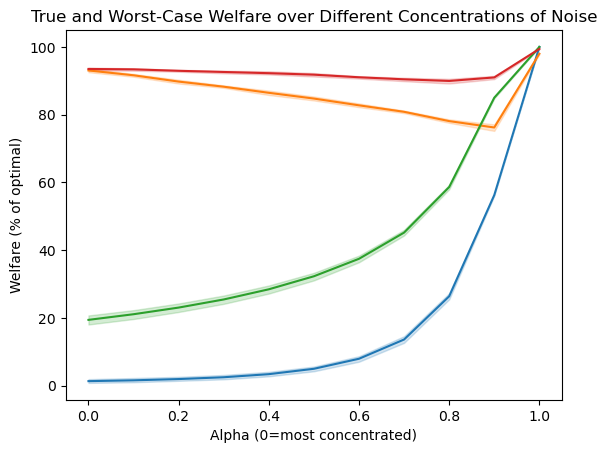

In [6]:
sns.lineplot(data=df[['alpha', 'seed', 'worst_usw_tpms']], x='alpha', y='worst_usw_tpms', legend="auto")
sns.lineplot(data=df[['alpha', 'seed', 'worst_usw_maxmin']], x='alpha', y='worst_usw_maxmin')
sns.lineplot(data=df[['alpha', 'seed', 'true_usw_tpms']], x='alpha', y='true_usw_tpms')
sns.lineplot(data=df[['alpha', 'seed', 'true_usw_maxmin']], x='alpha', y='true_usw_maxmin')

plt.title("True and Worst-Case Welfare over Different Concentrations of Noise")
plt.xlabel("Alpha (0=most concentrated)")
plt.ylabel("Welfare (% of optimal)")
plt.savefig("WelfareVaryingAlpha.png")

In [59]:
with open('stat_df_midl_dummy_revs.csv') as f:
    df = pd.read_csv(f)
df.shape

(4200, 4)

In [60]:
# df = df[['num_dummies', 'seed', 'true_usw_tpms', 'true_usw_maxmin']]
df.shape

(4200, 4)

In [61]:
df

,num_dummies,seed,Solver,true_value
0,0,0,Naive LP,99.493746
1,0,0,RRA,98.139431
2,0,1,Naive LP,99.588667
3,0,1,RRA,98.654186
4,0,2,Naive LP,99.722863
...,...,...,...,...
4195,100,97,RRA,96.058321
4196,100,98,Naive LP,85.737760
4197,100,98,RRA,95.631438
4198,100,99,Naive LP,86.508837


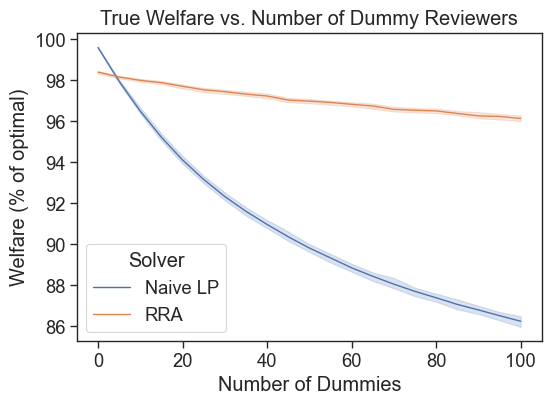

In [62]:
# sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_tpms']], x='num_dummies', y='true_usw_tpms', errorbar=('se', 6), legend='auto')
# sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_maxmin']], x='num_dummies', y='true_usw_maxmin', errorbar=('se', 6),)
sns.set(rc={"figure.figsize":(6, 4)}) #width=3, #height=4
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})
sns.set_style("ticks")

# sns.lineplot(data=df, x='num_dummies', y='true_value', hue='Solver', errorbar=('se', 3), legend='auto')
sns.lineplot(data=df, x='num_dummies', y='true_value', hue='Solver', errorbar=('ci', 100))

plt.title("True Welfare vs. Number of Dummy Reviewers")
plt.xlabel("Number of Dummies")
plt.ylabel("Welfare (% of optimal)")
plt.savefig("WelfareVaryingDummies.pdf", bbox_inches='tight')

In [63]:
with open('stat_df_midl_dummy_paps.csv') as f:
    df = pd.read_csv(f)
df.shape

(8400, 5)

In [64]:
df

,num_dummies,seed,Solver,DummiesOnly,true_value
0,0,0,Naive LP,False,99.493746
1,0,0,RRA,False,98.315797
2,0,0,Naive LP,True,NaN
3,0,0,RRA,True,NaN
4,0,1,Naive LP,False,99.588667
...,...,...,...,...,...
8395,100,98,RRA,True,95.625865
8396,100,99,Naive LP,False,86.629158
8397,100,99,RRA,False,96.798410
8398,100,99,Naive LP,True,83.590038


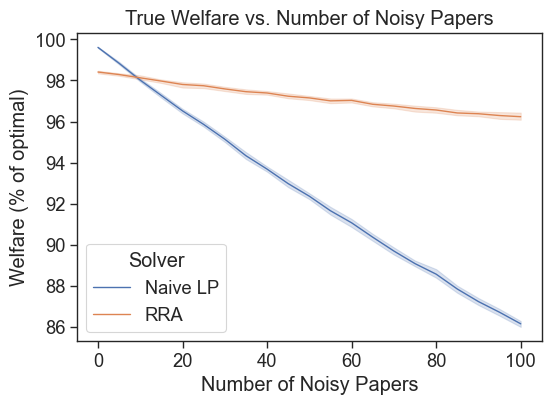

In [65]:
# sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_tpms']], x='num_dummies', y='true_usw_tpms', errorbar=('se', 6), legend='auto')
# sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_maxmin']], x='num_dummies', y='true_usw_maxmin', errorbar=('se', 6),)
sns.set(rc={"figure.figsize":(6, 4)}) #width=3, #height=4
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})
sns.set_style("ticks")

# sns.lineplot(data=df, x='num_dummies', y='true_value', hue='Solver', errorbar=('se', 3), legend='auto')
sns.lineplot(data=df[~df["DummiesOnly"]], x='num_dummies', y='true_value', hue='Solver', errorbar=('ci', 100))

plt.title("True Welfare vs. Number of Noisy Papers")
plt.xlabel("Number of Noisy Papers")
plt.ylabel("Welfare (% of optimal)")
plt.savefig("WelfareVaryingNoisyPapers.pdf", bbox_inches='tight')

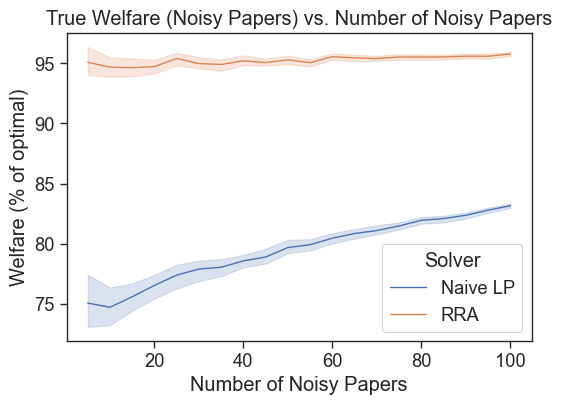

In [66]:
# sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_tpms']], x='num_dummies', y='true_usw_tpms', errorbar=('se', 6), legend='auto')
# sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_maxmin']], x='num_dummies', y='true_usw_maxmin', errorbar=('se', 6),)
sns.set(rc={"figure.figsize":(6, 4)}) #width=3, #height=4
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})
sns.set_style("ticks")

# sns.lineplot(data=df, x='num_dummies', y='true_value', hue='Solver', errorbar=('se', 3), legend='auto')
sns.lineplot(data=df[df["DummiesOnly"]], x='num_dummies', y='true_value', hue='Solver', errorbar=('ci', 100))

plt.title("True Welfare (Noisy Papers) vs. Number of Noisy Papers")
plt.xlabel("Number of Noisy Papers")
plt.ylabel("Welfare (% of optimal)")
plt.savefig("WelfareOnNoisyPapersVaryingNoisyPapers.pdf", bbox_inches='tight')

In [ ]:
# I should get the min, max, and median for the papers with noise, reported for a fixed number of noisy papers. 
# That seems more interesting than this, because we want to say that the individual papers are getting harmed... 
# which does seem to be the case but it's hard to say

# Plots for RAU2. We want to plot the true USW and GESW across all years for all algos

In [ ]:
stats = {'true_usw': 
         {
            2018: {'gesw': 1.45, 'rgesw': 0, 'usw': 1.61, 'rusw': 0}
            2019: {'gesw': 1.42, 'rgesw': 0, 'usw': 1.73, 'rusw': 0}
            2020: {'gesw': 1.40, 'rgesw': 0, 'usw': 1.78, 'rusw': 0}
            2021: {'gesw': 1.45, 'rgesw': 0, 'usw': 1.85, 'rusw': 0}
            2022: {'gesw': 1.44, 'rgesw': 0, 'usw': 1.83, 'rusw': 0}
        }
         'true_gesw': 
         {
            2018: {'gesw': 1.09, 'rgesw': 0.0, 'usw': 1.13, 'rusw': 0}
            2019: {'gesw': 1.05, 'rgesw': 0.0, 'usw': 1.18, 'rusw': 0}
            2020: {'gesw': 0.97, 'rgesw': 0.0, 'usw': 1.15, 'rusw': 0}
            2021: {'gesw': 1.00, 'rgesw': 0.0, 'usw': 1.25, 'rusw': 0}
            2022: {'gesw': 0.98, 'rgesw': 0.0, 'usw': 1.19, 'rusw': 0}
         }
}